# Simple Regression Model

In [158]:
#Importing everything I need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [159]:
#Creating my x data
x_data = np.linspace(0.0, 10.0, 1000000)
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [160]:
#Creating noise to add to Y data
noise = np.random.randn(len(x_data))
noise

array([ 1.32729021, -1.2628918 , -0.00796299, ...,  0.97843693,
       -0.09107165, -0.86235237])

### y = (0.5 * x_data) + 5 + noise

In [161]:
# Going to create the y data using the formula above
y_data = (0.5 * x_data) + 5 + noise
y_data

array([ 6.32729021,  3.7371132 ,  4.99204701, ..., 10.97842693,
        9.90892335,  9.13764763])

In [162]:
#Creating the x dataframe
x_df = pd.DataFrame(x_data, columns=['X'])
x_df.head()

,X
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [163]:
#Creating the y dataframe
y_df = pd.DataFrame(y_data, columns=['Y'])
y_df.head()

,Y
0,6.327290
1,3.737113
2,4.992047
3,5.034921
4,5.538806


In [164]:
my_data = pd.concat([x_df, y_df], axis=1)
my_data.head()

,X,Y
0,0.00000,6.327290
1,0.00001,3.737113
2,0.00002,4.992047
3,0.00003,5.034921
4,0.00004,5.538806


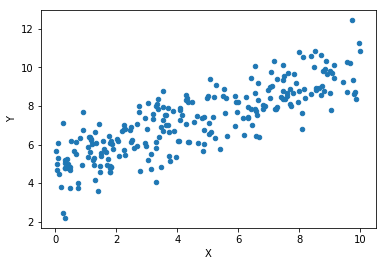

In [165]:
#Graphing the data using pandas dataframe
my_data.sample(n=250).plot(kind='scatter', x ='X', y='Y')

In [166]:
#Setting batch size
batch_size = 8

In [167]:
#Getting two random values
rand = np.random.randn(2)
rand

array([-1.5381205 ,  0.31349021])

In [168]:
#Setting the M and b variables to the random variables I got
m = tf.Variable(float(rand[0]))
b = tf.Variable(float(rand[1]))

In [169]:
#Creating the Placeholders
yph = tf.placeholder(tf.float32, [batch_size])
xph = tf.placeholder(tf.float32, [batch_size])

In [170]:
#Creating the model
y_model = m * xph + b

In [171]:
#Creating Error
error = tf.reduce_sum(tf.square(yph-y_model))

In [172]:
#Optimizing the model
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train = optimizer.minimize(error)

In [173]:
init = tf.global_variables_initializer()

In [174]:
#Training the modal by batches
with tf.Session() as sess:  
    
    sess.run(init)
    batches = 50000
    
    for _ in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_data[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        m_model, b_model = sess.run([m,b])

In [175]:
#Printing the thw weights after training
print(m_model, b_model)

0.4944149 5.016376


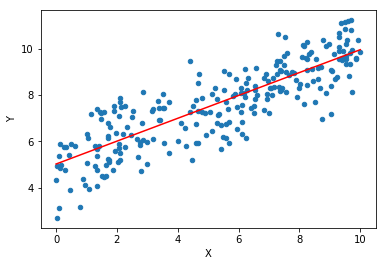

In [176]:
#Graphing the result
y_hat = m_model * x_data + b_model
my_data.sample(250).plot(kind='scatter', x='X',y='Y')
plt.plot(x_data, y_hat, 'r')